In [2]:
import numpy as np
import os
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
import tensorflow as tf

In [1]:
from tensorflow.keras.metrics import Precision, Recall

In [7]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
    
def f1score(y_true, y_pred):
    
    precision.update_state(y_true, y_pred)
    recall.update_state(y_true, y_pred)
    p = precision.result()
    r = recall.result()
    
    f1 = 2 * (p * r) / (p + r + tf.keras.backend.epsilon())  
    return f1

In [27]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\train\\',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\validation\\',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')


batch_data, batch_labels = next(iter(train_data))
print("Batch data shape:", batch_data.shape)
print("Batch labels shape:", batch_labels.shape)

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
Batch data shape: (32, 224, 224, 3)
Batch labels shape: (32, 5)


In [28]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),  
    Dense(5, activation='softmax') 
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy",Precision(), Recall(), f1score])

c:\Users\santhosh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.utils import to_categorical

In [30]:

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=model.fit(train_data,validation_data = valid_data,callbacks=[early_stopping,lr_scheduler],epochs=100,verbose=1)

c:\Users\santhosh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.4689 - f1score: 0.4226 - loss: 10.2032 - precision_2: 0.4779 - recall_2: 0.4560 - val_accuracy: 0.0971 - val_f1score: 0.4555 - val_loss: 2.4346 - val_precision_2: 0.1167 - val_recall_2: 0.0096 - learning_rate: 0.0010
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 981ms/step - accuracy: 0.5402 - f1score: 0.4356 - loss: 1.4916 - precision_2: 0.6936 - recall_2: 0.3687 - val_accuracy: 0.2722 - val_f1score: 0.4382 - val_loss: 1.6744 - val_precision_2: 0.2843 - val_recall_2: 0.0793 - learning_rate: 0.0010
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5585 - f1score: 0.4304 - loss: 1.3163 - precision_2: 0.7744 - recall_2: 0.3561 - val_accuracy: 0.3352 - val_f1score: 0.4341 - val_loss: 1.4456 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 831ms/step - accuracy: 0.6217 - f1score: 0.4323 - loss: 1.1669 - precision_2: 0.7762 - recall_2: 0.4

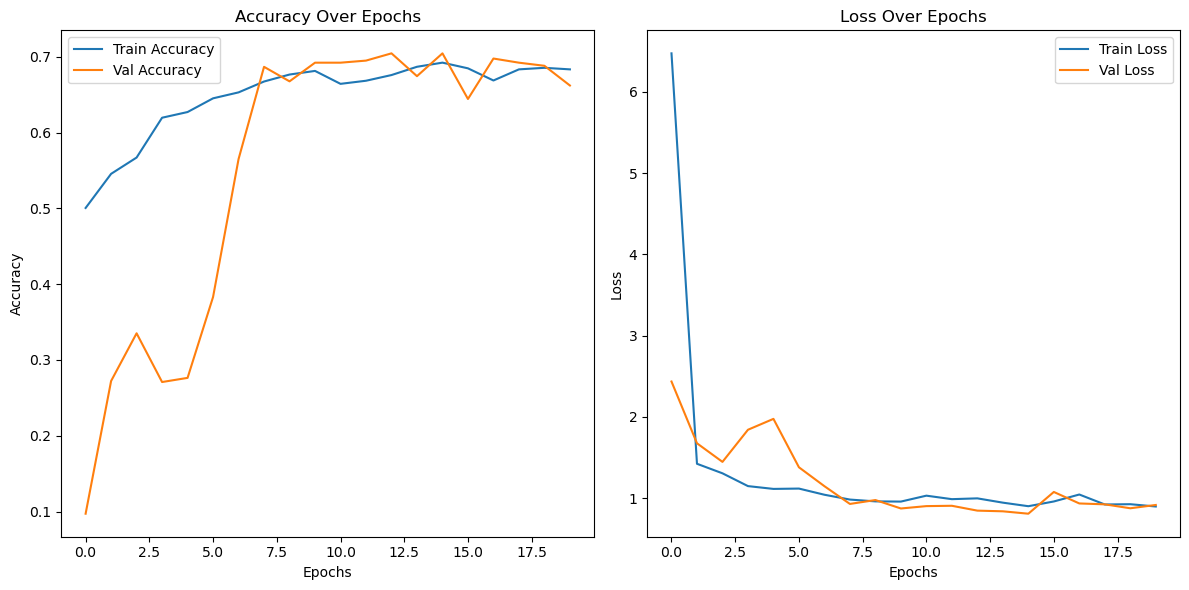

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
print(history.history.keys())

dict_keys(['accuracy', 'f1score', 'loss', 'precision_2', 'recall_2', 'val_accuracy', 'val_f1score', 'val_loss', 'val_precision_2', 'val_recall_2', 'learning_rate'])


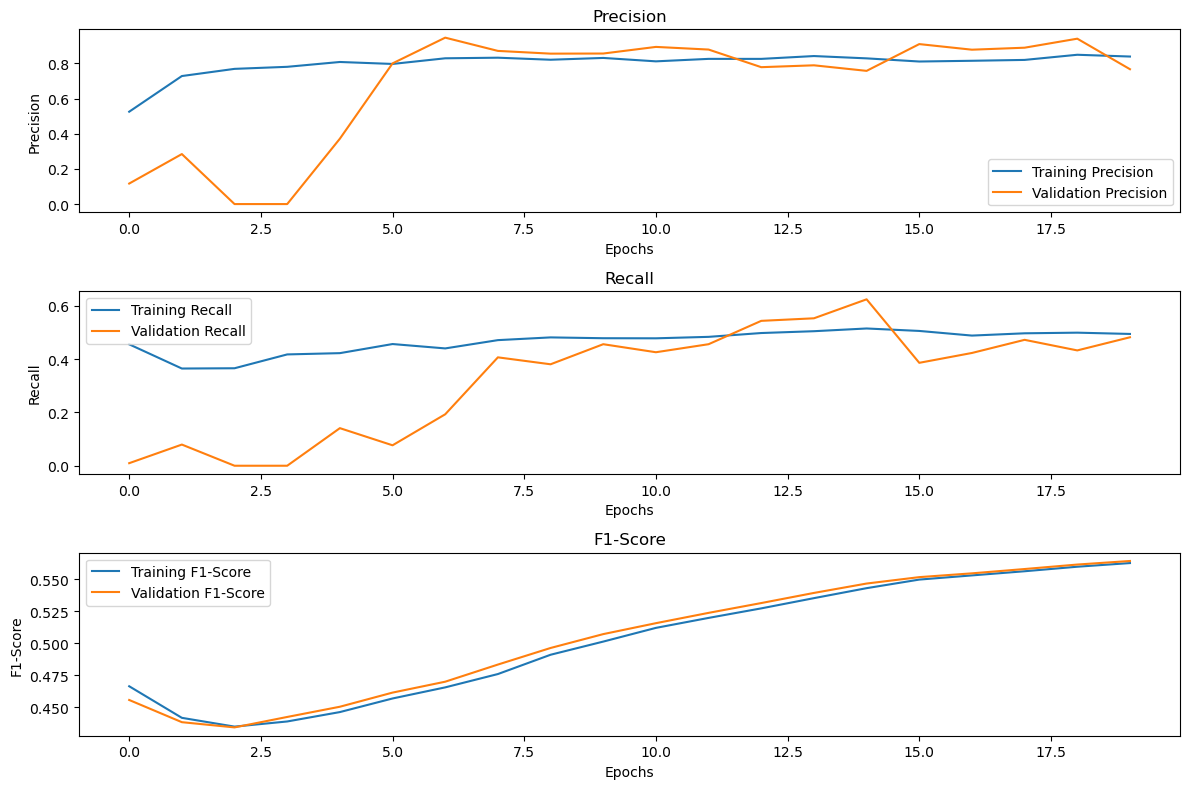

In [35]:
# Plot Precision, Recall, and F1-Score
plt.figure(figsize=(12, 8))

# Precision
plt.subplot(3, 1, 1)
plt.plot(history.history['precision_2'], label='Training Precision')
plt.plot(history.history['val_precision_2'], label='Validation Precision')
plt.title('Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall
plt.subplot(3, 1, 2)
plt.plot(history.history['recall_2'], label='Training Recall')
plt.plot(history.history['val_recall_2'], label='Validation Recall')
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# F1-Score
plt.subplot(3, 1, 3)
plt.plot(history.history['f1score'], label='Training F1-Score')
plt.plot(history.history['val_f1score'], label='Validation F1-Score')
plt.title('F1-Score')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
test_generator =datagen.flow_from_directory(
    directory=r'C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
result=model.evaluate(test_generator)

Found 3662 images belonging to 5 classes.
115/115 ━━━━━━━━━━━━━━━━━━━━ 66s 572ms/step - accuracy: 0.6010 - f1score: 0.5641 - loss: 1.0621 - precision_2: 0.6184 - recall_2: 0.5016


In [37]:
y_pred = np.argmax(model.predict(test_generator), axis=-1) 
y_true = test_generator.classes 

correct_predictions = np.sum(y_pred == y_true)
total_samples = len(y_true)

print(f"Number of correctly classified samples: {correct_predictions} out of {total_samples}")
print(f"Accuracy (in numbers): {correct_predictions}")

115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 334ms/step
Number of correctly classified samples: 2619 out of 3662
Accuracy (in numbers): 2619


In [39]:

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [40]:
accuracy = result[1] 
precision = precision_score(y_true, y_pred, average='weighted') 
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
loss=result[0]


print(f"Model accuracy: {accuracy * 100:.2f}%")
print(f"Model loss: {loss * 100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

Model accuracy: 71.65%
Model loss: 81.38%
Precision: 67.95%
Recall: 71.52%
F1-Score: 63.69%
